In [4]:
%%html
<style>
div.optional {
    display: block;
    background-color: #d7e2ff;
    border-color: #d7e2ff;
    border-left: 5px solid #d7e2ff;
    padding: 0.5em;
}
div.advanced {
    display: block;
    background-color: #fff4d7;
    border-color: #fff4d7;
    border-left: 5px solid #fff4d7;
    padding: 0.5em;
}
</style>

# Computational Mathematics <a class="tocSkip">

##  Interpolation, regression (or curve-fitting) and quadrature <a class="tocSkip">
    
### Homework Exercises  <a class="tocSkip">

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Homework" data-toc-modified-id="Homework-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Homework</a></span><ul class="toc-item"><li><span><a href="#Homework---Finding-two-model-parameters-given-two-pieces-of-data" data-toc-modified-id="Homework---Finding-two-model-parameters-given-two-pieces-of-data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Homework - Finding two model parameters given two pieces of data</a></span></li><li><span><a href="#Homework---Lagrange-polynomial" data-toc-modified-id="Homework---Lagrange-polynomial-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Homework - Lagrange polynomial</a></span></li><li><span><a href="#Homework---Implementing-a-trapezoidal-rule-function-and-compare-with-midpoint" data-toc-modified-id="Homework---Implementing-a-trapezoidal-rule-function-and-compare-with-midpoint-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Homework - Implementing a trapezoidal rule function and compare with midpoint</a></span></li><li><span><a href="#Homework---Newton-Cotes-quadrature-rules-[**]" data-toc-modified-id="Homework---Newton-Cotes-quadrature-rules-[**]-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Homework - Newton-Cotes quadrature rules [**]</a></span><ul class="toc-item"><li><span><a href="#Warning" data-toc-modified-id="Warning-1.4.1"><span class="toc-item-num">1.4.1&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Hint" data-toc-modified-id="Hint-1.4.2"><span class="toc-item-num">1.4.2&nbsp;&nbsp;</span>Hint</a></span></li></ul></li></ul></li></ul></div>

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# the following allows us to plot triangles indicating convergence order
from mpltools import annotation
# as this lecture is about interpolation we will make use of this SciPy library
import scipy.interpolate as si
import scipy.integrate

# some default font sizes for plots
plt.rcParams['font.size'] = 12
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial', 'Dejavu Sans']

# Homework

## Homework - Finding two model parameters given two pieces of data

We stated in class that:


The polynomial that fits the two data points $\{(x_0,y_0),(x_1,y_1)\}$ is clearly the linear function given by

$$ y = f(x) \equiv a_0 + a_1\,x \;\;\;\;\; \text{i.e. the degree one polynomial:} \;\;\;\;\; y = P_1(x) \equiv a_0 + a_1\,x$$

where through substitution of our data into the functional form we arrive at two simultaneous equations for two unknown parameters (or a $2\times 2$ matrix system)

\begin{align*}
(1) & \;\;\;\; y_0 = a_0 + a_1\,x_0, \\[5pt]
(2) & \;\;\;\; y_1 = a_0 + a_1\,x_1. 
\end{align*}

Show through the substitution of one equation into the other that this has the solution

$$ a_0 = y_0 - \frac{y_1-y_0}{x_1-x_0}x_0, \;\;\;\;\;\;\;\; a_1 = \frac{y_1-y_0}{x_1-x_0}. $$

Form the set of two simultaneous equations and solve by hand to derive this solution for the coefficients.


## Homework - Lagrange polynomial

Based upon the description of the Lagrange interpolating polynomial from class (including the Lagrange basis polynomials) try implementing functions to construct these and check your code by comparing our results visually against the results we obtained exactly for linear and quadratic problems, as well as the 6 data point example we found the degree 5 interpolating polynomial for using `SciPy` (i.e. the example copied below).

[I say check rather than verify as just confirming you get the right answer for one set of inputs isn't generally enough to argue full verification! Recall getting the right answer for the wrong reasons from an earlier lecture].

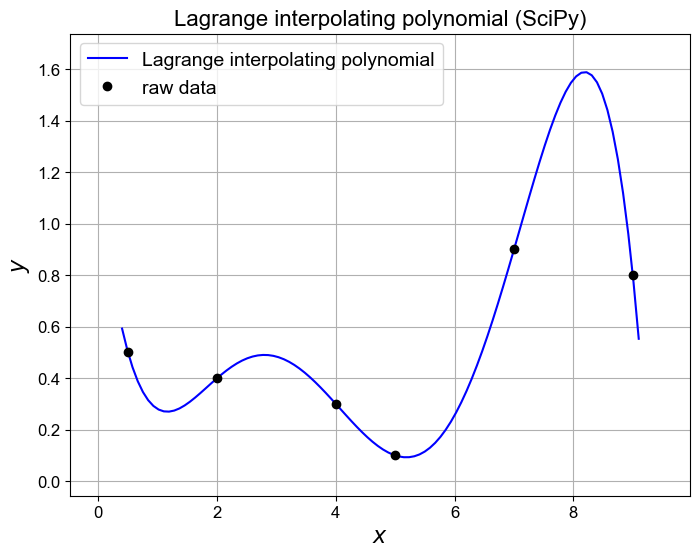

In [6]:
# The SciPy example from class

### Our raw data from earlier
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Create the Lagrange polynomial for the given points.
lp = si.lagrange(xi, yi)
# recall above that we executed 'import scipy.interpolate as si'
# and so this line is calling the 'lagrange' function from the 
# 'interpolate' sub-package within scipy.

# Evaluate this function at a high resolution (100 points here) so that 
# we get a smooth well-resolved line when we plot our polynomial
x = np.linspace(0.4, 9.1, 100)

# set up the figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)
ax1.margins(0.1)

# actually plot (x,y)=(x,lp(x)) on the axes with the label ax1
ax1.plot(x, lp(x), 'b', label='Lagrange interpolating polynomial')

# Overlay raw data on the same axes
def plot_raw_data(xi, yi, ax):
    """plot x vs y on axes ax, 
    add axes labels and turn on grid
    """
    ax.plot(xi, yi, 'ko', label='raw data')
    ax.set_xlabel('$x$', fontsize=16)
    ax.set_ylabel('$y$', fontsize=16)
    ax.grid(True)
    
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (SciPy)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);

If you want to follow my own solution, then you could start from the following code skeleton where you need to figure out how to complete to incomplete lines indicated by `.......`

*Pseudo-code / code skeleton:*

``` Python
def Lagrange_basis_poly(xi, x):
    """Calculate Lagrange basis polynomials.

    Parameters
    ----------
    xi : array_like
        The x-component of the data
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    l : ndarray
        The Lagrange polynomials evaluated at x, has size (len(xi), len(x))
    """
    # we have N+1 data points, and so the polynomial degree N must be the length of xi minus 1
    N = len(xi) - 1
    # the Lagrange basis polynomials are a product, so let's initialise them with 1
    # (cf. for a summation where we would most likely initialise with zero)
    # we have N+1 of them, and we want their values at locations x, hence size (N+1)xlen(x)
    l = np.ones((N+1, len(x)))
    # we want to iterate over i ranging from zero to N
    for i in range(0, N+1):
        for m in range(0, N+1):
            if (m != i):
                l[i, :] = .........
    return l


def Lagrange_interp_poly(xi, yi, x):
    """Calculates Lagrange interpolation polynomial from N+1 data points.

    Parameters
    ----------
    xi, yi : array_like
        The N+1 data points (i = 0, 1, ..., N)
    x : array_like
        Array of x-locations the polynomial is evaluated at

    Returns
    -------
    L : ndarray
        Lagrange interpolation polynomial evaluated at x
    """
    # first call our function above to calculate the individual basis functions l
    l = Lagrange_basis_poly(xi, x)
    print('len(xi), len(x), l.shape: ', len(xi), len(x), l.shape)
    # L is our Lagrange polynomial evaluated at the locations x
    L = np.zeros_like(x)
    for i in range(0, len(xi)):
        L = .............
    return L


# Our data points
xi = np.array([0.5, 2.0, 4.0, 5.0, 7.0, 9.0])
yi = np.array([0.5, 0.4, 0.3, 0.1, 0.9, 0.8])

# Define the x locations we will want to evaluate the Lagrange polynomial at - 
# enough points to get a smooth curve in the plot
x = np.linspace(0.4, 9.1, 100)

# Perform the Lagrange interpolation.
# L here is the evaluation of the Lagrange poly at locations x
L = Lagrange_interp_poly(xi, yi, x)


# set up figure
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(111)

# add a small margin
ax1.margins(0.1)

# plot (x, y) = (x, L(x))
ax1.plot(x, L, 'b', label='Lagrange polynomial')

# Overlay raw data
plot_raw_data(xi, yi, ax1)
ax1.set_title('Lagrange interpolating polynomial (our implementation)', fontsize=16)

# Add a legend
ax1.legend(loc='best', fontsize=14);
```

## Homework - Implementing a trapezoidal rule function and compare with midpoint

Recall from the lecture the trapezoidal rule

$$I_T := \sum_{i=0}^{n-1}\,   \left(\frac{f(x_{i+1}) + f(x_{i})}{2}\right )\, (x_{i+1}-x_i). $$

implement a function to calculate this estimate, and apply it to the `sin` example from the lecture.

Perform an error analysis and compare  the errors to the seemingly simpler midpoint rule.

You can also check for "exact" agreement with the SciPy implementation <a href="https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapz.html">`scipy.integrate.trapz`</a>,

or  <a href="https://docs.scipy.org/doc/scipy-0.10.1/reference/generated/scipy.integrate.trapezoid.html">`scipy.integrate.trapezoid`</a> 
depending on what version you're using.

<div class="advanced">

## Homework - Newton-Cotes quadrature rules [\*\*]

We stated in the lecture that:

"Note that an alternate derivation of the same rule [Simpsons] involves fitting a *quadratic function* (i.e. $P_2(x)$ rather than the constant and linear approximations already considered) that interpolates the integral at the two end points of the interval, $a$ and $b$, as well as at the midpoint, $c = \left ( a+b\right )/2$, and calculating the integral under that polynomial approximation."

Given that we can do this for different interpolating poynomials leads us to the family of [Newton-Cotes quadrature rules](https://en.wikipedia.org/wiki/Newton%E2%80%93Cotes_formulas) in the case where we use an interpolating polynomial that matches the function being integrated at *equally spaced* points over an interval.

<br>

Specifically, assume we have $N+1$ equally spaced data points $(x_i,y_i)$ [other families of quadrature rules follow from not having equally spaced points]. We will assume we are dealing with the integration of a known function and so $y_i = f(x_i)$.

**Note we are trying to be careful about the distinction between $n$ and $N$ throughout this lecture!**

We know from the material we saw on interpolation that we can fit an order $N$ polynomial exactly through these points; we call this  polynomial $P_N(x)$.

Recall the Lagrange form of $P_N$ was defined as

$$L(x) := \sum_{i=0}^{N} y_i \ell_i(x),$$

with the *Lagrange basis polynomials*  defined by the product

$$\ell_i(x) := \prod_{\begin{smallmatrix}0\le m\le N\\ m\neq i\end{smallmatrix}} \frac{x-x_m}{x_i-x_m} = \frac{(x-x_0)}{(x_i-x_0)} \cdots \frac{(x-x_{i-1})}{(x_i-x_{i-1})} \frac{(x-x_{i+1})}{(x_i-x_{i+1})} \cdots \frac{(x-x_N)}{(x_i-x_N)},$$

where $0\le i\le N$.

<br>

An approximation to our integral is therefore given by

\begin{align*}
I &\approx \int_a^b\,P_N(x)\,dx,\\[10pt]
&= \sum_{i=0}^{N}\, \left[\,f(x_i) \int_a^b\, \ell_i(x)\, dx\right],\\[10pt]
&=\sum_{i=0}^{N}\, A_i \, f(x_i),
\end{align*}

where

$$ A_i := \int_a^b\, \ell_i(x)\, dx, \;\;\;\; i = 0,1,\ldots,N. $$


Simply by varying $N$ we can come up with quadrature rules of arbitrary order. 

Let's check we can recreate the schemes we have already seen via this approach - consider the case $N=1$ and check you arrive a the Trapezoidal rule, and for $N=2$ that you arrive at Simpson's rule.

</div>

### Warning

- Recall from the previous lecture that fitting high-order polynomials through many (evenly spaced) data points was found to be a bad idea in the context of interpolation (we saw this in an example which used the Runge function). 


- This will of course also compromise the corresponding quadrature rules, and so we should be very careful about the use of high-order Newton-Cotes based quadrature.
    

### Hint

Note that the Trapezoidal rule derivation will require you to perform evaluations of integrals such as

\begin{align*}
A_0 & := \int_a^b\, \ell_0(x)\, dx  \\[5pt]
& = \frac{1}{a-b}\int_a^b\, (x-b)\, dx   \\[5pt]
&= \frac{1}{a-b}\left[\frac{x^2}{2} - b x\right]_a^b \\[5pt]
& = \frac{1}{a-b} \left[\frac{b^2 - a^2}{2} - b (b-a)\right]  \\[5pt]
&= -\frac 12 (a+b) + b = \frac{b-a}2,
\end{align*}


<br>

However, for Simpson's rule you will need to evaluate more complicated integrals of the form

\begin{align*}
A_0 &= \int_{x_0}^{x_2}\, \ell_0(x)\, dx \\[5pt]
& = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx.
\end{align*}

<br>

Note that this integral is much easier to do if you introduce the new variable (i.e. a [change of variables](https://en.wikipedia.org/wiki/Integration_by_substitution)) $\xi$ such that $d\xi = dx$ and $\xi=0$ corresponds to $x_1$, $\xi = -h$ corresponds to $x_0$ and $\xi = h$ corresponds to $x_2$. Note therefore that the interval size $x_2-x_0 = 2h$. 

Your integral then becomes

\begin{align*}
A_0 & = \frac{1}{(x_0-x_1)(x_0-x_2)}\int_{x_0}^{x_2}\, (x-x_1)(x - x_2) \, dx \\[5pt]
& = \frac{1}{(-h)(-2h)}\int_{-h}^{h}\, \xi(\xi - h) \, d\xi = \ldots = \frac{h}{3}.
\end{align*}

Fill in the gaps and do the other integrals to complete the derivation.